In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import requests

from afinn import Afinn
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.stem import LancasterStemmer
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
#Sentiment Analysis
afinn_wl_url = ('https://raw.githubusercontent.com'
                    '/fnielsen/afinn/master/afinn/data/AFINN-111.txt')

afinn_wl_df = pd.read_csv(afinn_wl_url,
                              header=None, # no column names
                              sep='\t',  # tab sepeated
                              names=['term', 'value']) #new column names
    
af_wordlist = list(afinn_wl_df["term"])
 
def combination(text,af_wordlist):
    # Load the lexicons
    afinn = Afinn()
    analyzer = SentimentIntensityAnalyzer()

    # Create a dictionary of words and their sentiment scores from SentiWordNet
    # Define the weights for each lexicon
    weights = {'AFINN': 0.4, 'NLTK(VADER)': 0.6}

    
    # Define a function to calculate the sentiment score of a given text
    def sentiment_score(text):
        blob1 = TextBlob(text)
        tokenized_words = blob1.words
        final_words = []
        for w in tokenized_words:
            final_words.append(w)
        L_stemmed_words= []
        for w in final_words:
            s = LancasterStemmer()
            stem_word = s.stem(w)
            L_stemmed_words.append(stem_word)
        text = ' '.join(L_stemmed_words)	# convert back to text with spaces
        
        scored_words = []
        new_text = text.split()
        for word in new_text:
            if word in af_wordlist:
                scored_words.append(word)           
        if len(scored_words) != 0:   
            afinn_score = afinn.score(text)/len(scored_words)
        else:
            afinn_score = afinn.score(text)
            
        nltk_score = SentimentIntensityAnalyzer().polarity_scores(text)["compound"]
    
        score = (weights['AFINN'] * afinn_score +
                 weights['NLTK(VADER)'] * nltk_score)
        ans_dict = {"Score":score,"Afinn_Score":afinn_score,"NLKT(Vader Score)":nltk_score}
        return ans_dict
    return sentiment_score(text)["Score"]

In [3]:
df = pd.read_csv("scraped_tweets_armaan_eth.csv")
df

,Unnamed: 0,Datetime,Tweet Id,Text,Hashtags,Replies,Retweets,Count_of_Likes,Location,Co-ordinates
0,0,2022-11-06 23:59:56+00:00,1589407264846258176,Collection: moonwalkers-by-liam-pannier \n Sol...,"['moonwalkers', 'boredape', 'blockchain', 'cry...",0,0,2,NaN,NaN
1,1,2022-11-06 23:59:56+00:00,1589407263642484736,Collection: chimpersnft \n Sold for: 1.1 Eth (...,"['chimpersnft', 'boredape', 'blockchain', 'cry...",0,0,3,NaN,NaN
2,2,2022-11-06 23:59:54+00:00,1589407258039156736,@JCollow But Ronaldo is starting every game un...,NaN,0,0,1,NaN,NaN
3,3,2022-11-06 23:59:53+00:00,1589407251156144130,#EverRise $RISE\n\n$0.000278 🔴 -5.9%\n$19.9M M...,"['EverRise', 'Eth', 'BNB', 'Polygon', 'Ftm', '...",0,0,0,NaN,NaN
4,4,2022-11-06 23:59:53+00:00,1589407250871119874,Meme coin - $mikaboshi - @mikaboshi_info\n\nIf...,"['erc', 'giveaway', 'contest', 'eth']",46,213,267,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
119995,119995,2022-11-09 17:07:18+00:00,1590390585013448704,#EverRise $RISE\n🟢 #Ethereum Buy\n🟢 Date/Time:...,"['EverRise', 'Ethereum']",0,0,0,NaN,NaN
119996,119996,2022-11-09 17:07:17+00:00,1590390583071477760,LFG JON!\n@odd_oddics \n@tatakj7 \n@YoubMayub ...,"['L2DAO', 'Swipelux', 'ETH']",0,0,0,NaN,NaN
119997,119997,2022-11-09 17:07:16+00:00,1590390578935918593,It's official... The bottom is in... Lets go! ...,"['Bitcoin', 'ETH', 'FTX', 'Binance']",1,0,1,"Place(id='3df4f427b5a60fea', fullName='San Ant...","Coordinates(longitude=-98.778559, latitude=29...."
119998,119998,2022-11-09 17:07:16+00:00,1590390578587762688,So who sodled all their ETH like the enlighten...,['Bitcoin'],2,0,0,NaN,NaN


In [4]:
#M3 senti
comb_senti = []
comb_senti_score = []
for i in range(df.shape[0]):
    text = df.iloc[i]["Text"]
    try:
        senti_comb = combination(text,af_wordlist)
    except:
        senti_comb = 0
    comb_senti_score.append(senti_comb)
    print(i)
comb_senti_score
for s in comb_senti_score:
    if s > 0.1:
        comb_senti.append("Positive")
    elif s < -0.1:
        comb_senti.append("Negative")
    else:
        comb_senti.append("Neutral")
    


df["Lexicon(NLTK)"] = comb_senti
df

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

,Unnamed: 0,Datetime,Tweet Id,Text,Hashtags,Replies,Retweets,Count_of_Likes,Location,Co-ordinates,Lexicon(NLTK)
0,0,2022-11-06 23:59:56+00:00,1589407264846258176,Collection: moonwalkers-by-liam-pannier \n Sol...,"['moonwalkers', 'boredape', 'blockchain', 'cry...",0,0,2,NaN,NaN,Neutral
1,1,2022-11-06 23:59:56+00:00,1589407263642484736,Collection: chimpersnft \n Sold for: 1.1 Eth (...,"['chimpersnft', 'boredape', 'blockchain', 'cry...",0,0,3,NaN,NaN,Neutral
2,2,2022-11-06 23:59:54+00:00,1589407258039156736,@JCollow But Ronaldo is starting every game un...,NaN,0,0,1,NaN,NaN,Neutral
3,3,2022-11-06 23:59:53+00:00,1589407251156144130,#EverRise $RISE\n\n$0.000278 🔴 -5.9%\n$19.9M M...,"['EverRise', 'Eth', 'BNB', 'Polygon', 'Ftm', '...",0,0,0,NaN,NaN,Neutral
4,4,2022-11-06 23:59:53+00:00,1589407250871119874,Meme coin - $mikaboshi - @mikaboshi_info\n\nIf...,"['erc', 'giveaway', 'contest', 'eth']",46,213,267,NaN,NaN,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
119995,119995,2022-11-09 17:07:18+00:00,1590390585013448704,#EverRise $RISE\n🟢 #Ethereum Buy\n🟢 Date/Time:...,"['EverRise', 'Ethereum']",0,0,0,NaN,NaN,Positive
119996,119996,2022-11-09 17:07:17+00:00,1590390583071477760,LFG JON!\n@odd_oddics \n@tatakj7 \n@YoubMayub ...,"['L2DAO', 'Swipelux', 'ETH']",0,0,0,NaN,NaN,Neutral
119997,119997,2022-11-09 17:07:16+00:00,1590390578935918593,It's official... The bottom is in... Lets go! ...,"['Bitcoin', 'ETH', 'FTX', 'Binance']",1,0,1,"Place(id='3df4f427b5a60fea', fullName='San Ant...","Coordinates(longitude=-98.778559, latitude=29....",Neutral
119998,119998,2022-11-09 17:07:16+00:00,1590390578587762688,So who sodled all their ETH like the enlighten...,['Bitcoin'],2,0,0,NaN,NaN,Positive


In [5]:
df["Lexicon(NLTK)"] = comb_senti
df.to_csv("Arm_eth_senti.csv")
df

,Unnamed: 0,Datetime,Tweet Id,Text,Hashtags,Replies,Retweets,Count_of_Likes,Location,Co-ordinates,Lexicon(NLTK)
0,0,2022-11-06 23:59:56+00:00,1589407264846258176,Collection: moonwalkers-by-liam-pannier \n Sol...,"['moonwalkers', 'boredape', 'blockchain', 'cry...",0,0,2,NaN,NaN,Neutral
1,1,2022-11-06 23:59:56+00:00,1589407263642484736,Collection: chimpersnft \n Sold for: 1.1 Eth (...,"['chimpersnft', 'boredape', 'blockchain', 'cry...",0,0,3,NaN,NaN,Neutral
2,2,2022-11-06 23:59:54+00:00,1589407258039156736,@JCollow But Ronaldo is starting every game un...,NaN,0,0,1,NaN,NaN,Neutral
3,3,2022-11-06 23:59:53+00:00,1589407251156144130,#EverRise $RISE\n\n$0.000278 🔴 -5.9%\n$19.9M M...,"['EverRise', 'Eth', 'BNB', 'Polygon', 'Ftm', '...",0,0,0,NaN,NaN,Neutral
4,4,2022-11-06 23:59:53+00:00,1589407250871119874,Meme coin - $mikaboshi - @mikaboshi_info\n\nIf...,"['erc', 'giveaway', 'contest', 'eth']",46,213,267,NaN,NaN,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
119995,119995,2022-11-09 17:07:18+00:00,1590390585013448704,#EverRise $RISE\n🟢 #Ethereum Buy\n🟢 Date/Time:...,"['EverRise', 'Ethereum']",0,0,0,NaN,NaN,Positive
119996,119996,2022-11-09 17:07:17+00:00,1590390583071477760,LFG JON!\n@odd_oddics \n@tatakj7 \n@YoubMayub ...,"['L2DAO', 'Swipelux', 'ETH']",0,0,0,NaN,NaN,Neutral
119997,119997,2022-11-09 17:07:16+00:00,1590390578935918593,It's official... The bottom is in... Lets go! ...,"['Bitcoin', 'ETH', 'FTX', 'Binance']",1,0,1,"Place(id='3df4f427b5a60fea', fullName='San Ant...","Coordinates(longitude=-98.778559, latitude=29....",Neutral
119998,119998,2022-11-09 17:07:16+00:00,1590390578587762688,So who sodled all their ETH like the enlighten...,['Bitcoin'],2,0,0,NaN,NaN,Positive


<Axes: ylabel='Sentiment(%)'>

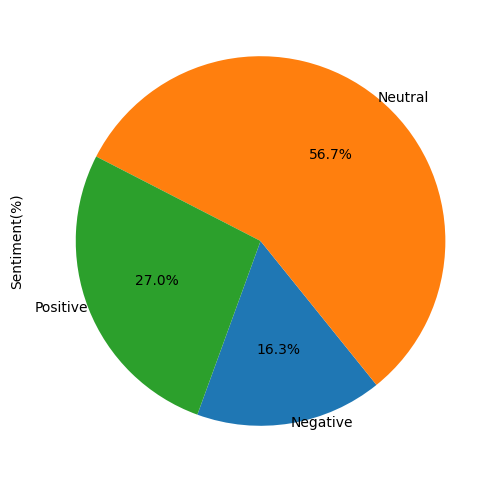

In [6]:
#Pie-Chart
sentis = df.groupby(['Lexicon(NLTK)']).size()
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentis.plot.pie(ax=ax, autopct='%1.1f%%', startangle=250, fontsize=10, labeldistance = 1, label="Sentiment(%)")

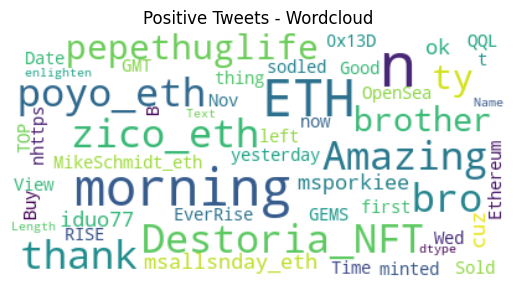

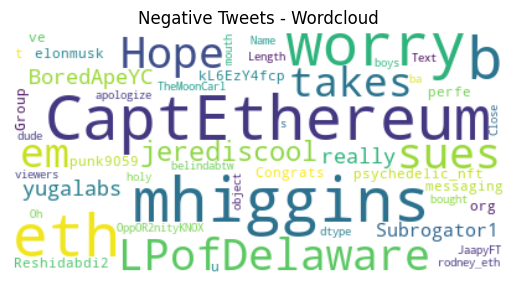

In [7]:
#Word Cloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS
 
# Wordcloud with positive tweets
positive_tweets = df['Text'][df["Lexicon(NLTK)"] == 'Positive']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
print("===============================================================================")
# Wordcloud with negative tweets
negative_tweets = df['Text'][df["Lexicon(NLTK)"] == 'Negative']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


eth: 55534
#eth: 16617
’: 14890
price: 11609
️: 9929
#crypto: 9643
#btc: 8882
btc: 8497
usd: 6750
🔥: 6255
#bitcoin: 6215
#ethereum: 5574
sold: 5099
🚀: 5035
#nft: 5013
like: 4989
last: 4477
one: 4289
get: 3853
sol: 3763
new: 3744
💰: 3617
bought: 3576
•: 3494
buy: 3477
collection: 3439
#blockchain: 3414
crypto: 3343
good: 3298
gm: 3213
#cryptocurrency: 3204
🔴: 3192
follow: 3163
time: 3109
#nfts: 3070
long: 3050
):: 3047
market: 2914
see: 2740
❤: 2700
😂: 2673
ftx: 2656
volume: 2616
go: 2537
would: 2498
…: 2490
#altcoin: 2481
love: 2462
please: 2409
still: 2393


Text(0, 0.5, 'Frequency')

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/op

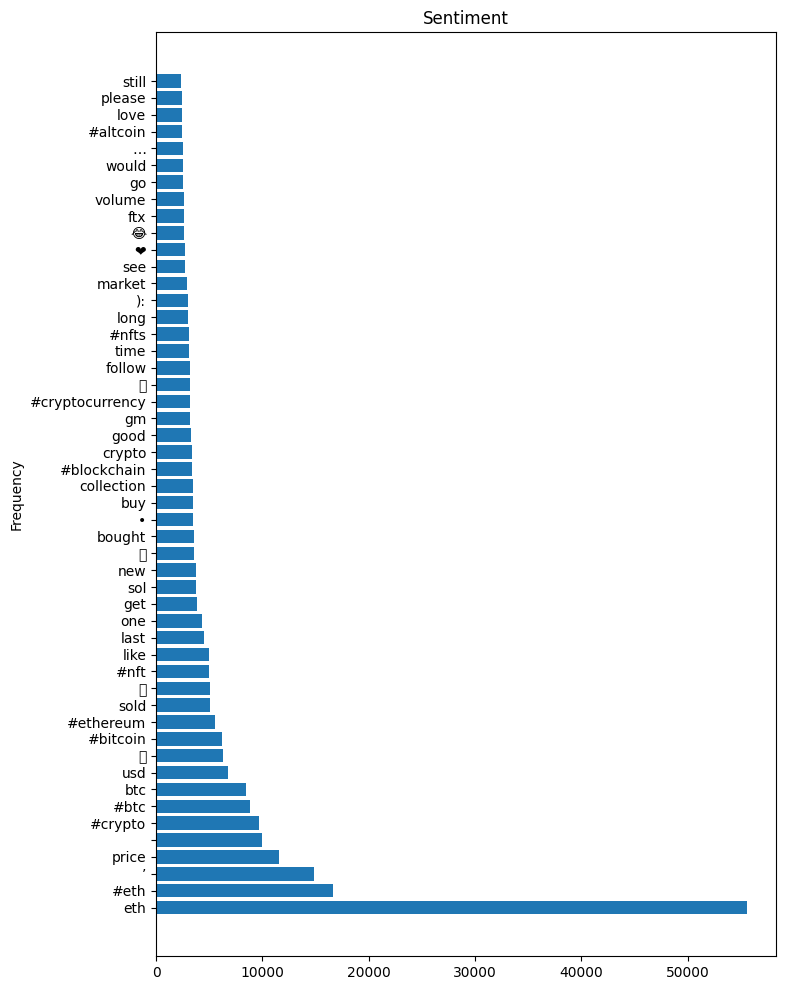

In [8]:
#Max term Used
import string
import json
from collections import Counter
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

def process(text, tokenizer=TweetTokenizer(), stopwords=[]):
    text = text.lower()
    tokens = tokenizer.tokenize(text)
    return [tok for tok in tokens if tok not in stopwords and not tok.isdigit()]


tweet_tokenizer = TweetTokenizer()
punct = list(string.punctuation)
stopword_list = stopwords.words('english') + punct + ['rt', 'via', '...']
tf = Counter()

# Loop through each row of the DataFrame and process the tweet text
for i, row in df.iterrows():
    tokens = process(text=row['Text'], tokenizer=tweet_tokenizer, stopwords=stopword_list)
    tf.update(tokens)

# Print the most common terms and plot the results
x_labels = []
for tag, count in tf.most_common(50):
    print("{}: {}".format(tag, count))
    x_labels.append(tag)
    
y = [count for tag, count in tf.most_common(50)]
fig = plt.figure(figsize=(8, 12))
x = x_labels
plt.barh(x, y)
plt.title("Sentiment")
plt.ylabel("Frequency")
#plt.savefig('Sentiment')

In [9]:
df = pd.read_csv("Arm_eth_senti.csv")
df.drop(['Unnamed: 0.1'], axis=1, inplace=True)
# Convert the 'Datetime' column to datetime format, and set non-datetime values to NaT
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
df['Unnamed: 0'] = pd.to_numeric(df['Unnamed: 0'], errors='coerce')

# Drop rows where the 'Datetime' column is NaT (i.e., not a datetime value)
df.dropna(subset=['Datetime','Unnamed: 0'], inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df

/tmp/ipykernel_887/540623773.py:1: DtypeWarning: Columns (1,2,4,5,7,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Arm_eth_senti.csv")


,Unnamed: 0,Datetime,Tweet Id,Text,Hashtags,Replies,Retweets,Count_of_Likes,Location,Co-ordinates,Lexicon(NLTK)
0,0.0,2022-11-06 23:59:56+00:00,1.589407e+18,Collection: moonwalkers-by-liam-pannier \n Sol...,"['moonwalkers', 'boredape', 'blockchain', 'cry...",0.0,0,2.0,NaN,NaN,Neutral
1,1.0,2022-11-06 23:59:56+00:00,1.589407e+18,Collection: chimpersnft \n Sold for: 1.1 Eth (...,"['chimpersnft', 'boredape', 'blockchain', 'cry...",0.0,0,3.0,NaN,NaN,Neutral
2,2.0,2022-11-06 23:59:54+00:00,1.589407e+18,@JCollow But Ronaldo is starting every game un...,NaN,0.0,0,1.0,NaN,NaN,Neutral
3,3.0,2022-11-06 23:59:53+00:00,1.589407e+18,#EverRise $RISE\n\n$0.000278 🔴 -5.9%\n$19.9M M...,"['EverRise', 'Eth', 'BNB', 'Polygon', 'Ftm', '...",0.0,0,0.0,NaN,NaN,Neutral
4,4.0,2022-11-06 23:59:53+00:00,1.589407e+18,Meme coin - $mikaboshi - @mikaboshi_info\n\nIf...,"['erc', 'giveaway', 'contest', 'eth']",46.0,213,267.0,NaN,NaN,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
119995,119995.0,2022-11-09 17:07:18+00:00,1.590391e+18,#EverRise $RISE\n🟢 #Ethereum Buy\n🟢 Date/Time:...,"['EverRise', 'Ethereum']",0.0,0,0.0,NaN,NaN,Positive
119996,119996.0,2022-11-09 17:07:17+00:00,1.590391e+18,LFG JON!\n@odd_oddics \n@tatakj7 \n@YoubMayub ...,"['L2DAO', 'Swipelux', 'ETH']",0.0,0,0.0,NaN,NaN,Neutral
119997,119997.0,2022-11-09 17:07:16+00:00,1.590391e+18,It's official... The bottom is in... Lets go! ...,"['Bitcoin', 'ETH', 'FTX', 'Binance']",1.0,0,1.0,"Place(id='3df4f427b5a60fea', fullName='San Ant...","Coordinates(longitude=-98.778559, latitude=29....",Neutral
119998,119998.0,2022-11-09 17:07:16+00:00,1.590391e+18,So who sodled all their ETH like the enlighten...,['Bitcoin'],2.0,0,0.0,NaN,NaN,Positive


<Axes: ylabel='Sentiment(%)'>

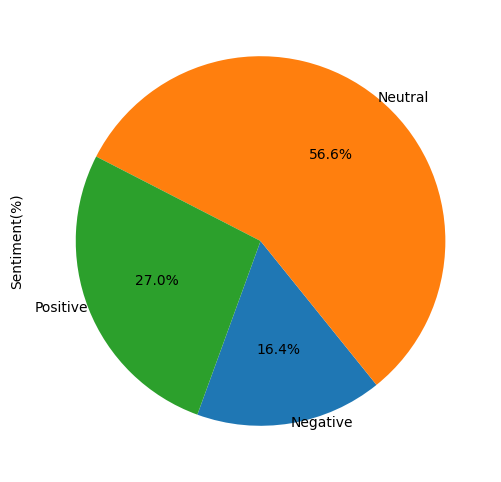

In [10]:
#Pie-Chart
sentis = df.groupby(['Lexicon(NLTK)']).size()
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentis.plot.pie(ax=ax, autopct='%1.1f%%', startangle=250, fontsize=10, labeldistance = 1, label="Sentiment(%)")

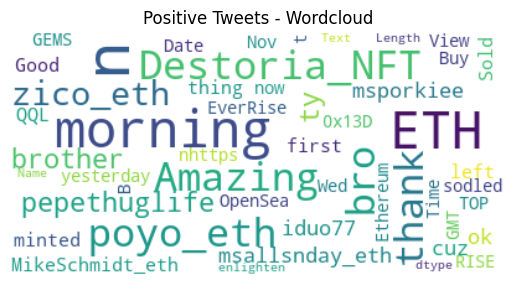

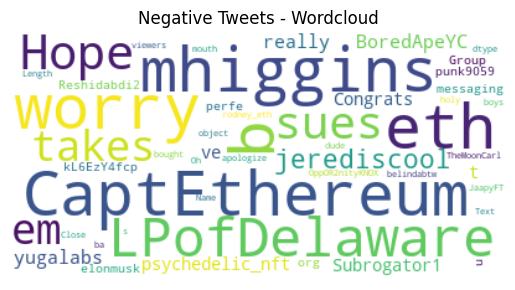

In [11]:
#Word Cloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS
 
# Wordcloud with positive tweets
positive_tweets = df['Text'][df["Lexicon(NLTK)"] == 'Positive']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
print("===============================================================================")
# Wordcloud with negative tweets
negative_tweets = df['Text'][df["Lexicon(NLTK)"] == 'Negative']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


eth: 55533
#eth: 16601
’: 14890
price: 11607
️: 9929
#crypto: 9636
#btc: 8882
btc: 8497
usd: 6750
🔥: 6255
#bitcoin: 6212
#ethereum: 5574
sold: 5099
🚀: 5035
#nft: 5013
like: 4989
last: 4475
one: 4289
get: 3853
sol: 3763
new: 3744
💰: 3617
bought: 3576
•: 3494
buy: 3477
collection: 3439
#blockchain: 3408
crypto: 3343
good: 3298
gm: 3213
#cryptocurrency: 3199
🔴: 3192
follow: 3163
time: 3109
#nfts: 3070
long: 3050
):: 3047
market: 2914
see: 2740
❤: 2700
😂: 2673
ftx: 2656
volume: 2616
go: 2537
would: 2498
…: 2490
#altcoin: 2478
love: 2462
please: 2409
still: 2393


Text(0, 0.5, 'Frequency')

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/op

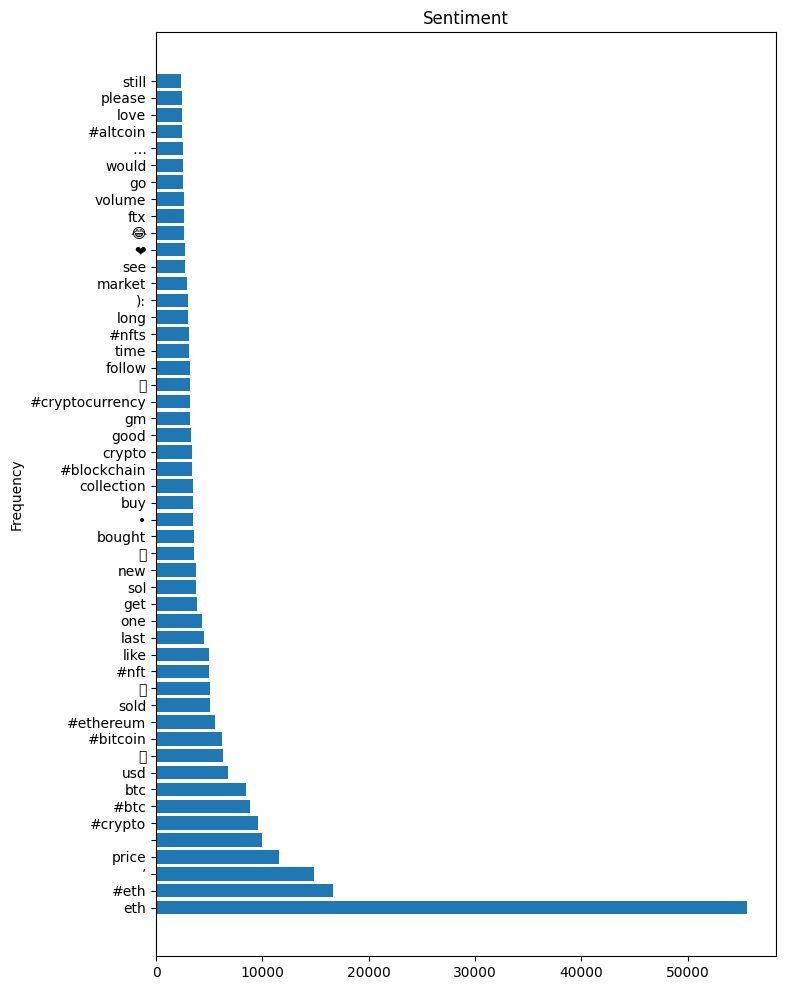

In [12]:
#Max term Used
import string
import json
from collections import Counter
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

def process(text, tokenizer=TweetTokenizer(), stopwords=[]):
    text = text.lower()
    tokens = tokenizer.tokenize(text)
    return [tok for tok in tokens if tok not in stopwords and not tok.isdigit()]


tweet_tokenizer = TweetTokenizer()
punct = list(string.punctuation)
stopword_list = stopwords.words('english') + punct + ['rt', 'via', '...']
tf = Counter()

# Loop through each row of the DataFrame and process the tweet text
for i, row in df.iterrows():
    tokens = process(text=row['Text'], tokenizer=tweet_tokenizer, stopwords=stopword_list)
    tf.update(tokens)

# Print the most common terms and plot the results
x_labels = []
for tag, count in tf.most_common(50):
    print("{}: {}".format(tag, count))
    x_labels.append(tag)
    
y = [count for tag, count in tf.most_common(50)]
fig = plt.figure(figsize=(8, 12))
x = x_labels
plt.barh(x, y)
plt.title("Sentiment")
plt.ylabel("Frequency")
#plt.savefig('Sentiment')

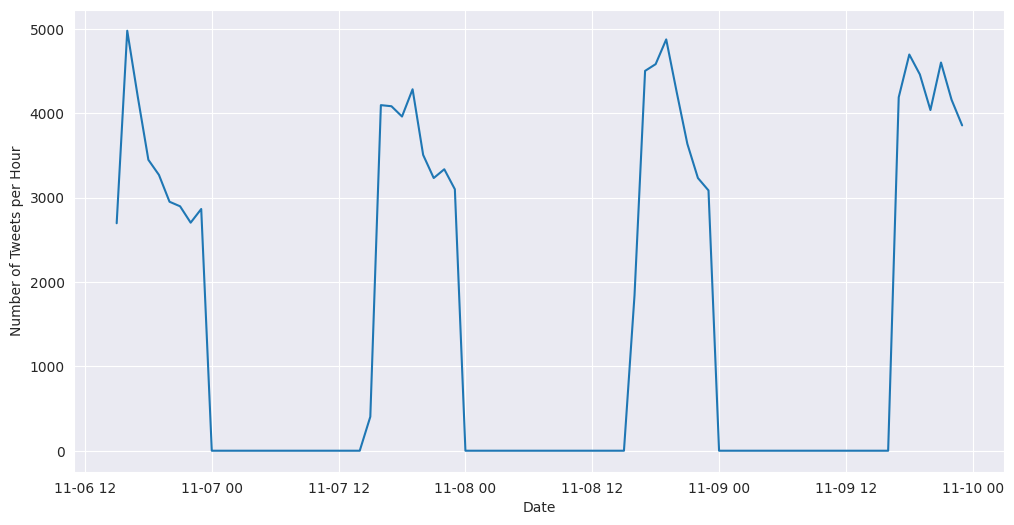

In [13]:
import seaborn as sns

# Set the Datetime column as the index
df.set_index('Datetime', inplace=True)

# Resample the DataFrame to get the count of tweets per hour
tweets_per_hour = df.resample('H').count()['Tweet Id']

# Graph the tweets per hour using seaborn
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.lineplot(data=tweets_per_hour)
plt.xlabel('Date')
plt.ylabel('Number of Tweets per Hour')
plt.show()